# Задание
* Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
* Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
  * обработку пропусков в данных;
  * кодирование категориальных признаков;
  * масштабирование данных.

# Датасет
[Japan Hostel Dataset](https://www.kaggle.com/koki25ando/hostel-world-dataset)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/Hostel.csv', sep=",")
total_count = data.shape[0]
data.shape

(342, 16)

In [3]:
data.dtypes

Unnamed: 0         int64
hostel.name       object
City              object
price.from         int64
Distance          object
summary.score    float64
rating.band       object
atmosphere       float64
cleanliness      float64
facilities       float64
location.y       float64
security         float64
staff            float64
valueformoney    float64
lon              float64
lat              float64
dtype: object

In [4]:
data.isnull().sum()

Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score    15
rating.band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64

data.head()

# Обработка пропусков в данных
## Простые стратегии - удаление или заполнение нулями
### Удаление колонок, содержащих пустые значения

In [5]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((342, 16), (342, 5))

### Удаление строк, содержащих пустые значения

In [6]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((342, 16), (298, 16))

### Заполнение всех пропущенных значений нулями

In [7]:
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.isnull().sum()

Unnamed: 0       0
hostel.name      0
City             0
price.from       0
Distance         0
summary.score    0
rating.band      0
atmosphere       0
cleanliness      0
facilities       0
location.y       0
security         0
staff            0
valueformoney    0
lon              0
lat              0
dtype: int64

## "Внедрение значений" - импьютация (imputation)
### Обработка пропусков в числовых данных

In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка summary.score. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка atmosphere. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка cleanliness. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка facilities. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка location.y. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка security. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка staff. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка valueformoney. Тип данных float64. Количество пустых значений 15, 4.39%.
Колонка lon. Тип данных float64. Количество пустых значений 44, 12.87%.
Колонка lat. Тип данных float64. Количество пустых значений 44, 12.87%.


In [9]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num.head()

summary.score  atmosphere  cleanliness  facilities  location.y  security  \
0            9.2         8.9          9.4         9.3         8.9       9.0   
1            9.5         9.4          9.7         9.5         9.7       9.2   
2            8.7         8.0          7.0         9.0         8.0      10.0   
3            7.4         8.0          7.5         7.5         7.5       7.0   
4            9.4         9.5          9.5         9.0         9.0       9.5   

   staff  valueformoney         lon        lat  
0    9.4            9.4  135.513767  34.682678  
1    9.7            9.5         NaN        NaN  
2   10.0            9.0  139.777472  35.697447  
3    8.0            6.5  139.783667  35.712716  
4   10.0            9.5  139.798371  35.727898

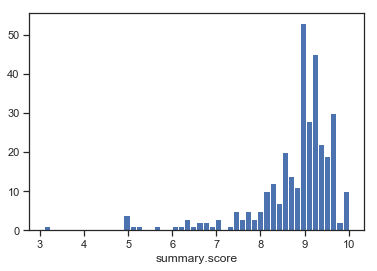

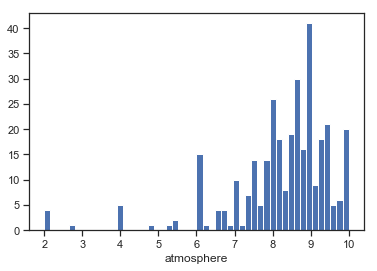

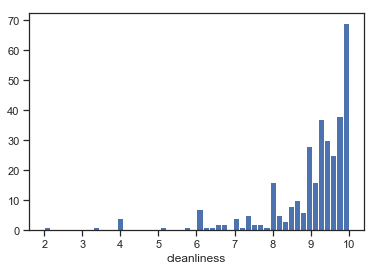

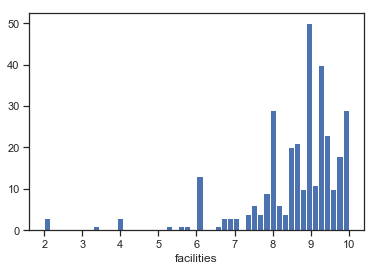

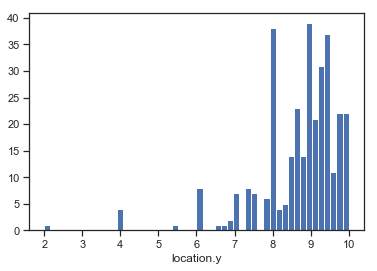

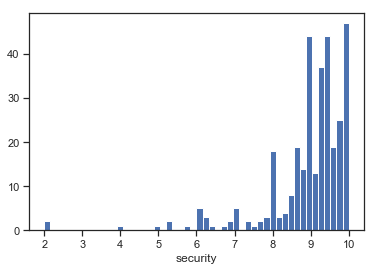

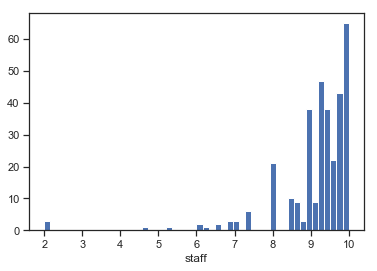

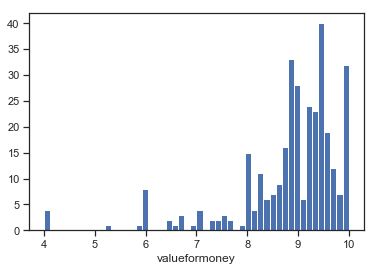

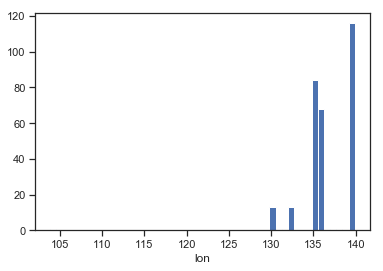

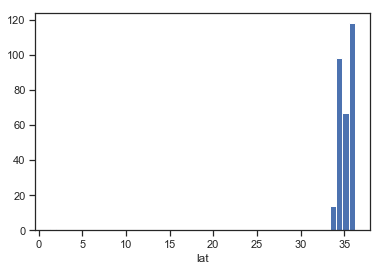

In [10]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [11]:
# Фильтр по пустым значениям поля valueformoney 
data[data['valueformoney'].isnull()].head()

Unnamed: 0                           hostel.name   City  price.from  \
8            9              3Q House - Asakusa Smile  Tokyo        2500   
43          44                        Calendar Hotel  Kyoto        3500   
44          45  Capsule Hotel Anshin Oyado Akihabara  Tokyo        6200   
45          46  Capsule Hotel Anshin Oyado Shinbashi  Tokyo        6000   
71          72                        FUJITAYA Kyoto  Kyoto        3500   

                   Distance  summary.score rating.band  atmosphere  \
8   10.2km from city centre            NaN         NaN         NaN   
43   8.8km from city centre            NaN         NaN         NaN   
44     0km from city centre            NaN         NaN         NaN   
45   6.6km from city centre            NaN         NaN         NaN   
71   2.6km from city centre            NaN         NaN         NaN   

    cleanliness  facilities  location.y  security  staff  valueformoney  lon  \
8           NaN         NaN         NaN       NaN    NaN            NaN  NaN   
43          NaN         NaN         NaN       NaN    NaN            NaN  NaN   
44          NaN         NaN         NaN       NaN    NaN            NaN  NaN   
45          NaN         NaN         NaN       NaN    NaN            NaN  NaN   
71          NaN         NaN         NaN       NaN    NaN            NaN  NaN   

    lat  
8   NaN  
43  NaN  
44  NaN  
45  NaN  
71  NaN

In [12]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['valueformoney'].isnull()].index
flt_index

Int64Index([8, 43, 44, 45, 71, 126, 153, 157, 159, 212, 213, 217, 230, 305,
            336],
           dtype='int64')

In [13]:
data_num[data_num.index.isin(flt_index)]['valueformoney']

8     NaN
43    NaN
44    NaN
45    NaN
71    NaN
126   NaN
153   NaN
157   NaN
159   NaN
212   NaN
213   NaN
217   NaN
230   NaN
305   NaN
336   NaN
Name: valueformoney, dtype: float64

In [14]:
data_num_valueformoney = data_num[['valueformoney']]
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [15]:
# Маска пропусков
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_valueformoney)

In [16]:
# Функция для теста стратегий
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_valueformoney)
    return data_num_imp[mask_missing_values_only]

In [17]:
strategies=['mean', 'median','most_frequent']
strategies[0], test_num_impute(strategies[0])

('mean', array([8.84831804, 8.84831804, 8.84831804, 8.84831804, 8.84831804,
        8.84831804, 8.84831804, 8.84831804, 8.84831804, 8.84831804,
        8.84831804, 8.84831804, 8.84831804, 8.84831804, 8.84831804]))

In [18]:
strategies[1], test_num_impute(strategies[1])

('median', array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]))

In [19]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10.]))

In [20]:
# Функция, которая позволяет задавать колонку и вид импьютации
def test_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [21]:
test_impute_col(data, 'location.y', strategies[0])

('location.y', 'mean', 15, 8.694801223241589, 8.694801223241589)

In [22]:
test_impute_col(data, 'location.y', strategies[1])

('location.y', 'median', 15, 9.0, 9.0)

In [23]:
test_impute_col(data, 'location.y', strategies[2])

('location.y', 'most_frequent', 15, 8.0, 8.0)

###  Обработка пропусков в категориальных данных

In [24]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка rating.band. Тип данных object. Количество пустых значений 15, 4.39%.


Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [25]:
# Стратегия most_frequent
test_impute_col(data, 'rating.band', strategies[2])

('rating.band', 'most_frequent', 15, 'Superb', 'Superb')

In [26]:
# constant
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
cat_temp_data = data[['rating.band']]
data_imp3 = imp3.fit_transform(cat_temp_data)
np.unique(data_imp3)

array(['!!!', 'Fabulous', 'Good', 'Rating', 'Superb', 'Very Good'],
      dtype=object)

# Преобразование категориальных признаков в числовые

In [27]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc.head()

c1
0     Superb
1     Superb
2   Fabulous
3  Very Good
4     Superb

## Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
# LabelEncoder может использоваться для нормализации меток (кодирование меток со значением от 0 до n_classes-1)
cat_enc_le = le.fit_transform(cat_enc['c1'])
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

cat_enc['c1'].unique()

In [29]:
## преобразовать метки обратно в оригинальную кодировку
le.inverse_transform([0, 1, 2, 3])

array(['Fabulous', 'Good', 'Rating', 'Superb'], dtype=object)

## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [30]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(342, 1)

In [31]:
cat_enc_ohe.shape

(342, 5)

In [32]:
cat_enc_ohe

<342x5 sparse matrix of type '<class 'numpy.float64'>'
	with 342 stored elements in Compressed Sparse Row format>

In [33]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [34]:
# Преобразовать категориальную переменную в фиктивные / индикаторные переменные
pd.get_dummies(cat_enc).head()

c1_Fabulous  c1_Good  c1_Rating  c1_Superb  c1_Very Good
0            0        0          0          1             0
1            0        0          0          1             0
2            1        0          0          0             0
3            0        0          0          0             1
4            0        0          0          1             0

In [35]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

rating.band_Fabulous  rating.band_Good  rating.band_Rating  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     1                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   

   rating.band_Superb  rating.band_Very Good  rating.band_nan  
0                   1                      0                0  
1                   1                      0                0  
2                   0                      0                0  
3                   0                      1                0  
4                   1                      0                0

In [36]:
pd.get_dummies(cat_enc, dummy_na=True).head()

c1_Fabulous  c1_Good  c1_Rating  c1_Superb  c1_Very Good  c1_nan
0            0        0          0          1             0       0
1            0        0          0          1             0       0
2            1        0          0          0             0       0
3            0        0          0          0             1       0
4            0        0          0          1             0       0

# Масштабирование данных
Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [38]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['valueformoney']])

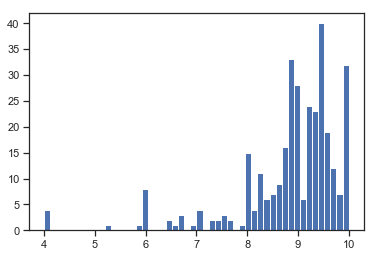

In [39]:
plt.hist(data['valueformoney'], 50)
plt.show()

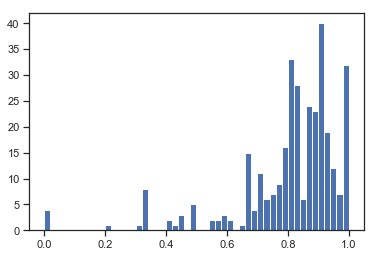

In [40]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

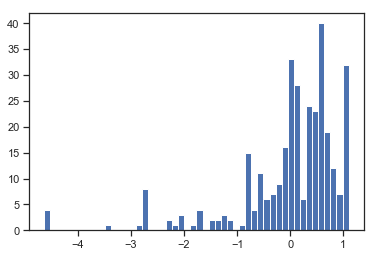

In [41]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['valueformoney']])
plt.hist(sc2_data, 50)
plt.show()

## [Нормализация данных](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

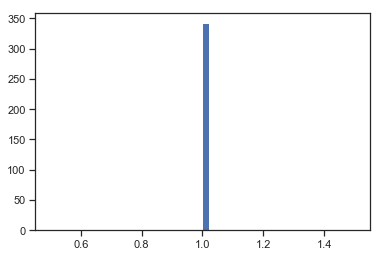

In [42]:
sc3 = Normalizer()
sc3_data = imp2.fit_transform(data[['valueformoney']])
sc3_data = sc3.fit_transform(sc3_data)
plt.hist(sc3_data, 50)
plt.show()